In [1]:
import pandas as pd

file_path = '/Users/purvatandel/Desktop/Zip(zhvf_and_zhvi)_combined/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'  
df = pd.read_csv(file_path)

df_melted = pd.melt(df, 
                    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], 
                    var_name='Date', 
                    value_name='Value')

df_melted['Date'] = pd.to_datetime(df_melted['Date'])

df_melted['Year'] = df_melted['Date'].dt.year
yearly_avg = df_melted.groupby(['RegionID', 'Year'])['Value'].mean().reset_index()

yearly_avg_pivot = yearly_avg.pivot(index='RegionID', columns='Year', values='Value').reset_index()

output_file = 'yearly_averages.csv'
yearly_avg_pivot.to_csv(output_file, index=False)

print(f'Yearly averages saved to {output_file}')


Yearly averages saved to yearly_averages.csv


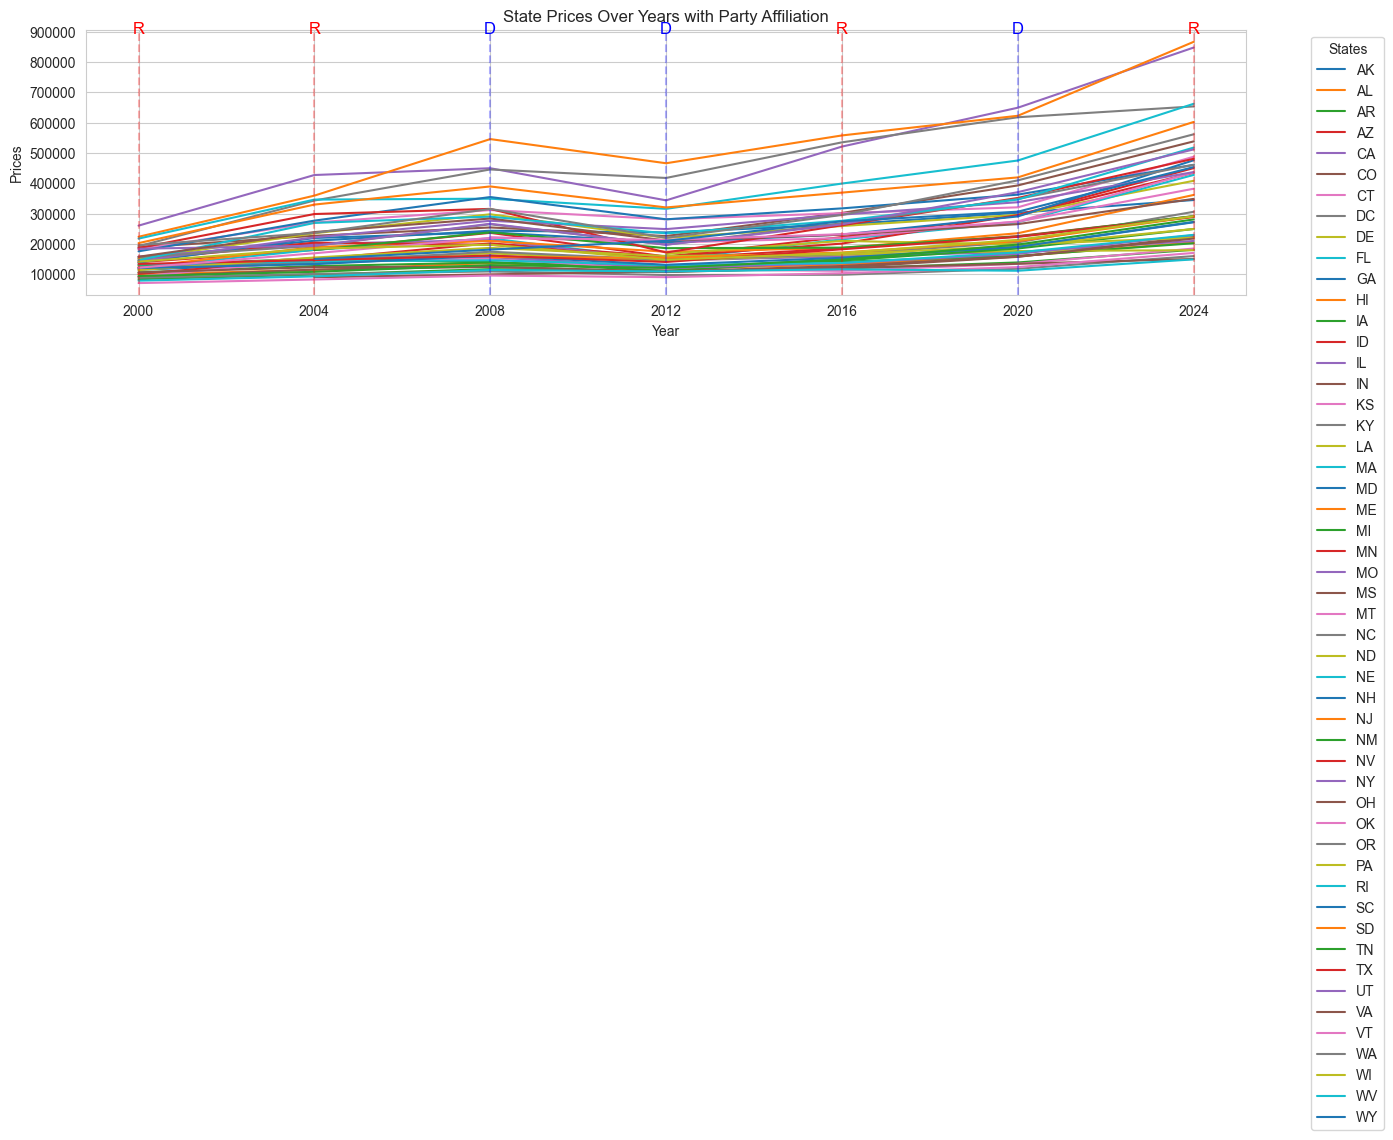

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/Users/purvatandel/Desktop/yearly_avg_house_prices.csv'  
df = pd.read_csv(file_path)


df.set_index('Year', inplace=True)


party_colors = {'R': 'red', 'D': 'blue'}
parties = df['party'].map(party_colors)

df_states = df.drop(columns='party')

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

for state in df_states.columns:
    plt.plot(df_states.index, df_states[state], label=state)

for year, (color, party) in zip(df.index, zip(parties, df['party'])):
    plt.axvline(x=year, color=color, linestyle='--', alpha=0.3)
    plt.text(year, df_states.max().max() * 1.02, party, color=color, 
             ha='center', va='bottom', fontsize=12) 


plt.xlabel('Year')
plt.ylabel('Prices')
plt.title('State Prices Over Years with Party Affiliation')
plt.xticks([2000, 2004, 2008, 2012, 2016, 2020, 2024])


plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
